https://docs.google.com/document/d/1CQFp25sCyrXsWO8Qj9HqXVk_TmAF7tNLstLsHy2sSzs/edit

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score
import numpy as np

# Ler o arquivo PSV
df = pd.read_csv('dataset3.psv', sep='|')

# Salvar os dados em um arquivo CSV
df.to_csv('dataset3.csv', index=False)

df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1.0,48,3.0,17,0,NaN,0
54804,74592,Operations,region_27,Master's & above,f,other,1.0,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1.0,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1.0,29,1.0,2,0,45.0,0


In [66]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    employee_id          54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       49962 non-null  float64
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    47350 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.4+ MB
None
        employee_id  no_of_trainings            age  previo

Item a)

In [67]:
print(df.department.unique())

print(df.region.unique())

print(df.education.unique())

print(df.gender.unique())

print(df.recruitment_channel.unique())


['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal' 'quem trouxe quenga']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18' 'casa da lu na suecia']
["Master's & above" "Bachelor's" nan 'Below Secondary']
['f' 'm' 'MALE' 'fEMALE' 'eu sou homem hetero homossexual!']
['sourcing' 'other' 'referred']


In [68]:
df['gender'] = df['gender'].replace('fEMALE', 'f')
df['gender'] = df['gender'].replace('MALE', 'm')

print(df.gender.unique())

['f' 'm' 'eu sou homem hetero homossexual!']


In [69]:
# Tirando os engraçadinhos
df = df.drop(df[df['department'] == 'quem trouxe quenga'].index)
df = df.drop(df[df['region'] == 'casa da lu na suecia'].index)
df = df.drop(df[df['gender'] == 'eu sou homem hetero homossexual!'].index)

print(df.department.unique())

print(df.region.unique())

print(df.gender.unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_24'
 'region_3' 'region_9' 'region_33' 'region_18']
['f' 'm']


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54555 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    employee_id          54555 non-null  int64  
 1   department            54555 non-null  object 
 2   region                54555 non-null  object 
 3   education             52146 non-null  object 
 4   gender                54555 non-null  object 
 5   recruitment_channel   54555 non-null  object 
 6   no_of_trainings       49711 non-null  float64
 7   age                   54555 non-null  int64  
 8   previous_year_rating  50441 non-null  float64
 9   length_of_service     54555 non-null  int64  
 10  awards_won?           54555 non-null  int64  
 11  avg_training_score    47100 non-null  float64
 12  is_promoted           54555 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.8+ MB


In [71]:
# Se coluna de número de treinamentos está vazia se assume que a pessoa não realizou nenhum, similarmente com a educação
df['no_of_trainings'] = df['no_of_trainings'].fillna(0)

df['education'] = df['education'].fillna("Below Secondary")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54555 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    employee_id          54555 non-null  int64  
 1   department            54555 non-null  object 
 2   region                54555 non-null  object 
 3   education             54555 non-null  object 
 4   gender                54555 non-null  object 
 5   recruitment_channel   54555 non-null  object 
 6   no_of_trainings       54555 non-null  float64
 7   age                   54555 non-null  int64  
 8   previous_year_rating  50441 non-null  float64
 9   length_of_service     54555 non-null  int64  
 10  awards_won?           54555 non-null  int64  
 11  avg_training_score    47100 non-null  float64
 12  is_promoted           54555 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.8+ MB


In [72]:
# Transformar valores negativos em positivos na coluna 'age'
df['age'] = df['age'].abs()

# Imprimir os valores maiores que 100 na coluna 'age'
print(df[df['age'] > 100]['age'])

df = df.drop(df[df['age'] == 123456].index)

print(df.age.min())
print(df.age.max())

318      123456
341      123456
429      123456
771      123456
1199     123456
          ...  
53399    123456
53892    123456
54051    123456
54462    123456
54698    123456
Name: age, Length: 106, dtype: int64
20
60


In [73]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54449.000000,54449.000000,54449.000000,50375.000000,54449.000000,54449.000000,47018.000000,54449.000000
mean,39195.586512,1.145641,34.817352,3.330243,5.869493,0.022682,63.504084,0.085328
std,22590.899160,0.685974,7.648249,1.260837,4.261186,0.148888,13.497572,0.279371
min,1.000000,0.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19670.000000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39220.000000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58734.000000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [74]:
# Se não realizou treinamentos, a nota média de treinamentos recebe 0
df.loc[df['no_of_trainings'] == 0, 'avg_training_score'] = 0

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54449 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    employee_id          54449 non-null  int64  
 1   department            54449 non-null  object 
 2   region                54449 non-null  object 
 3   education             54449 non-null  object 
 4   gender                54449 non-null  object 
 5   recruitment_channel   54449 non-null  object 
 6   no_of_trainings       54449 non-null  float64
 7   age                   54449 non-null  int64  
 8   previous_year_rating  50375 non-null  float64
 9   length_of_service     54449 non-null  int64  
 10  awards_won?           54449 non-null  int64  
 11  avg_training_score    51838 non-null  float64
 12  is_promoted           54449 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 5.8+ MB


In [75]:
# Calcular a média das colunas 'previous_year_rating' e 'avg_training_score' agrupadas por 'no_of_trainings'
mean_ratings = df.groupby('no_of_trainings')['previous_year_rating'].mean()
mean_scores = df.groupby('no_of_trainings')['avg_training_score'].mean()

# Substituir os valores nulos nas colunas 'previous_year_rating' e 'avg_training_score' pela média correspondente
df['previous_year_rating'] = df.apply(lambda x: mean_ratings[x['no_of_trainings']] if pd.isnull(x['previous_year_rating']) else x['previous_year_rating'], axis=1)
df['avg_training_score'] = df.apply(lambda x: mean_scores[x['no_of_trainings']] if pd.isnull(x['avg_training_score']) else x['avg_training_score'], axis=1)


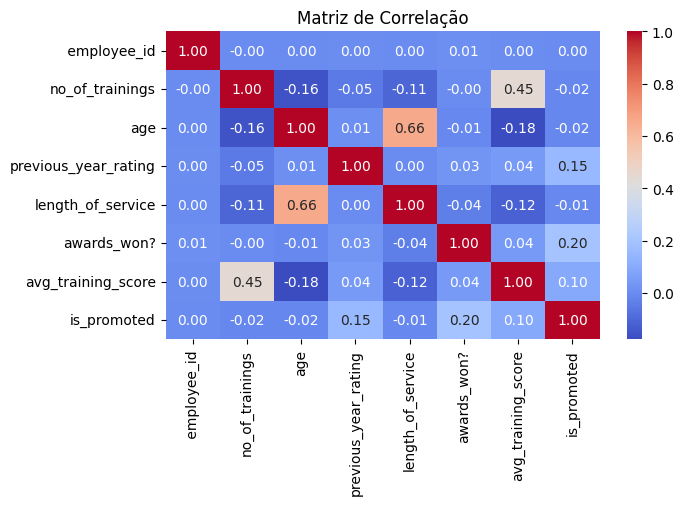

In [76]:
# Criar matriz de correlação para o dataset
colunas_numericas = df.select_dtypes(include='number')

matriz_correlacao = colunas_numericas.corr()

matriz_correlacao = df.select_dtypes(include='number').corr()

plt.figure(figsize=(7, 4))

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matriz de Correlação')

plt.show()

Item b) Após a limpeza de dados, percebe-se que a maioria das variáveis tem correlação baixísima entre si e o dataset não parece ter outliers, apenas dados errados que foram removidos.

Item c) Utilizei Label Encoding para as variáveis sem ordem específica e Ordinal Encoding para a educação, que aumenta conforme a complexidade da graduação do funcionário.

In [77]:
'''
 1   department            54555 non-null  object
 2   region                54555 non-null  object
 3   education             54555 non-null  object
 4   gender                54555 non-null  object
 5   recruitment_channel   54555 non-null  object
'''

label_encoder = LabelEncoder()

df['department'] = label_encoder.fit_transform(df['department'])

label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

label_encoder = LabelEncoder()
df['recruitment_channel'] = label_encoder.fit_transform(df['recruitment_channel'])

label_encoder = LabelEncoder()

df['region'] = label_encoder.fit_transform(df['region'])


ordinal_encoder = OrdinalEncoder()

ordem_categorias = ["Below Secondary", "Bachelor's", "Master's & above"]

df['education'] = ordinal_encoder.fit_transform(df[['education']], ordem_categorias)


Item d)

In [78]:
'''
  0    employee_id          54449 non-null  int64
 1   department            54449 non-null  object
 2   region                54449 non-null  object
 3   education             54449 non-null  object
 4   gender                54449 non-null  object
 5   recruitment_channel   54449 non-null  object
 6   no_of_trainings       54449 non-null  float64
 7   age                   54449 non-null  int64
 8   previous_year_rating  50375 non-null  float64
 9   length_of_service     54449 non-null  int64
 10  awards_won?           54449 non-null  int64
 11  avg_training_score    51838 non-null  float64
 12  is_promoted           54449 non-null  int64

 '''

scaler = MinMaxScaler()

colunas_continuas = ['no_of_trainings', 'previous_year_rating', 'avg_training_score']
df[colunas_continuas] = scaler.fit_transform(df[colunas_continuas])

Item e)

In [79]:
# Separar os dados em variáveis preditoras (X) e variável alvo (y)
X = df.drop('is_promoted', axis=1)
y = df['is_promoted']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

melhor_k = None
melhor_acuracia = 0.0

# Testar diferentes valores de K e encontrar o menor número de vizinhos com a maior acurácia
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acuracia = accuracy_score(y_test, y_pred)

    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_k = k

print("Melhor valor de K:", melhor_k)
print("Maior acurácia:", melhor_acuracia)

Melhor valor de K: 10
Maior acurácia: 0.9141414141414141


Item f) Dados desbalanceados são dados em que determinada característica que se deseja treinar o modelo para identificar aparece com frequência muito maior ou muito menor em relação ao restante dos dados. Isso faz com que os modelos possam assumir que a característica presente na maioria dos dados ocorra 100% das vezes e ainda assim consiga uma boa acurácia. Aparentemente isso ocorreu com o modelo KNN acima pois o número de funcionários sugeridos para promoção é muito baixo, cerca de 8%.

In [80]:
# Contando o número de funcionários que estão sugeridos para promoção
count_0 = df['is_promoted'].value_counts()[0]
count_1 = df['is_promoted'].value_counts()[1]

print("Número de colunas iguais a 0:", count_0)
print("Número de colunas iguais a 1:", count_1)

Número de colunas iguais a 0: 49803
Número de colunas iguais a 1: 4646


In [81]:
count_1/(count_1+count_0)

0.08532755422505464

Item g) Precisão = Verdadeiros positivos / (Verdadeiros positivos + Falsos positivos), calcula quantidade de positivos classificados corretamente.

Recall = Verdadeiros positivos / (Verdadeiros positivos + Falsos negativos), calcula a quantidade de positivos classificados em relação a quantidade real de positivos.

A precisão e o recall do modelo foram 0, o que indica que o erro suposto no item f realmente aconteceu, o modelo previu que 0 funcionários seriam promovidos.

In [82]:
# Criar o modelo KNN com o melhor valor de K encontrado
model = KNeighborsClassifier(n_neighbors=melhor_k)

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular a precisão e o recall
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precisão:", precisao)
print("Recall:", recall)

Precisão: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
if 1 in y_pred:
    precisao = precision_score(y_test, y_pred)
else:
    precisao = 0.0

print(precisao)

0.0


Item h) Foi utilizada a técnica de reamostragem Oversampling a fim de aumentar o número de dados da classe minoritária no conjunto de dados. Estes são gerados artificialmente através da técnica SMOTE, que interpola características dos dados reais existentes.
Pedi pro ChatGPT criar um código que testasse os valores do *sampling_strategy*, proporção de aumento dos dados, para que esta maximizasse o recall e a precisão

In [144]:
#Separar as features e o target
X = df.drop('is_promoted', axis=1)
y = df['is_promoted']

melhor_s = None
melhor_precisao = 0.0
melhor_recall = 0.0

#Testar diferentes valores de sampling strategy e encontrar o melhor
for s in np.arange(0.1, 1.1, 0.1):
  oversampler = SMOTE(sampling_strategy=s)
  X_oversampled, y_oversampled = oversampler.fit_resample(X, y)


# Separar os dados em variáveis preditoras (X) e variável alvo (y)
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=27)

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

if precisao > melhor_precisao and recall > melhor_recall:
    melhor_precisao = precisao
    melhor_recall = recall
    melhor_s = s
print("Melhor valor de sampling strategy:", melhor_s)
print("Melhor precisão:", melhor_precisao)
print("Melhor recall:", melhor_recall)

#Criar o modelo KNN com o melhor valor de sampling strategy encontrado
oversampler = SMOTE(sampling_strategy=melhor_s)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

#Separar os dados em variáveis preditoras (X) e variável alvo (y)
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=27)

model = KNeighborsClassifier(n_neighbors=3)

#Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

#Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

#Calcular a precisão e o recall
precisao = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

#Exibir os resultados
print("Precisão:", precisao)
print("Recall:", recall)

Melhor valor de sampling strategy: 1.0
Melhor precisão: 0.712460815047022
Melhor recall: 0.9158774934515415
Precisão: 0.7098842664998436
Recall: 0.9145678017328229
